In [1]:
import numpy as np
import tensorflow as tf
import schedules
from matplotlib import pyplot as plt

In [2]:
train_steps = 1000

warmup_epochs = 5
max_epochs = 90

schedule = schedules.DecayWithWarmup(
    base_lr=0.1,
    warmup_steps=warmup_epochs * train_steps,
    max_steps=max_epochs * train_steps,
)

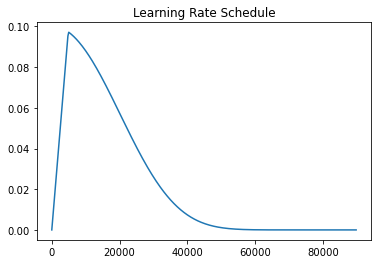

In [3]:
step_list = [step*250 for step in range(90*4)]
lr_list = [schedule(step) for step in step_list]

plt.title("Learning Rate Schedule")
plt.plot(step_list, lr_list)
plt.show()